who
child     83
man      537
woman    271
Name: age, dtype: int64 people

people alive who
child     49
man       88
woman    205
Name: survived, dtype: int64

die people who
child     34
man      449
woman     66
dtype: int64

class wise cost class
First     18177.4125
Second     3801.8417
Third      6714.6951
Name: fare, dtype: float64

class catagories die class
First      80
Second     97
Third     372
dtype: int64

class people  class
First     216
Second    184
Third     491
Name: age, dtype: int64



C:\Users\NASIM\AppData\Local\Temp\ipykernel_13408\1680685205.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["age"],data["fare"],marker="*",cmap="hot",c="y")


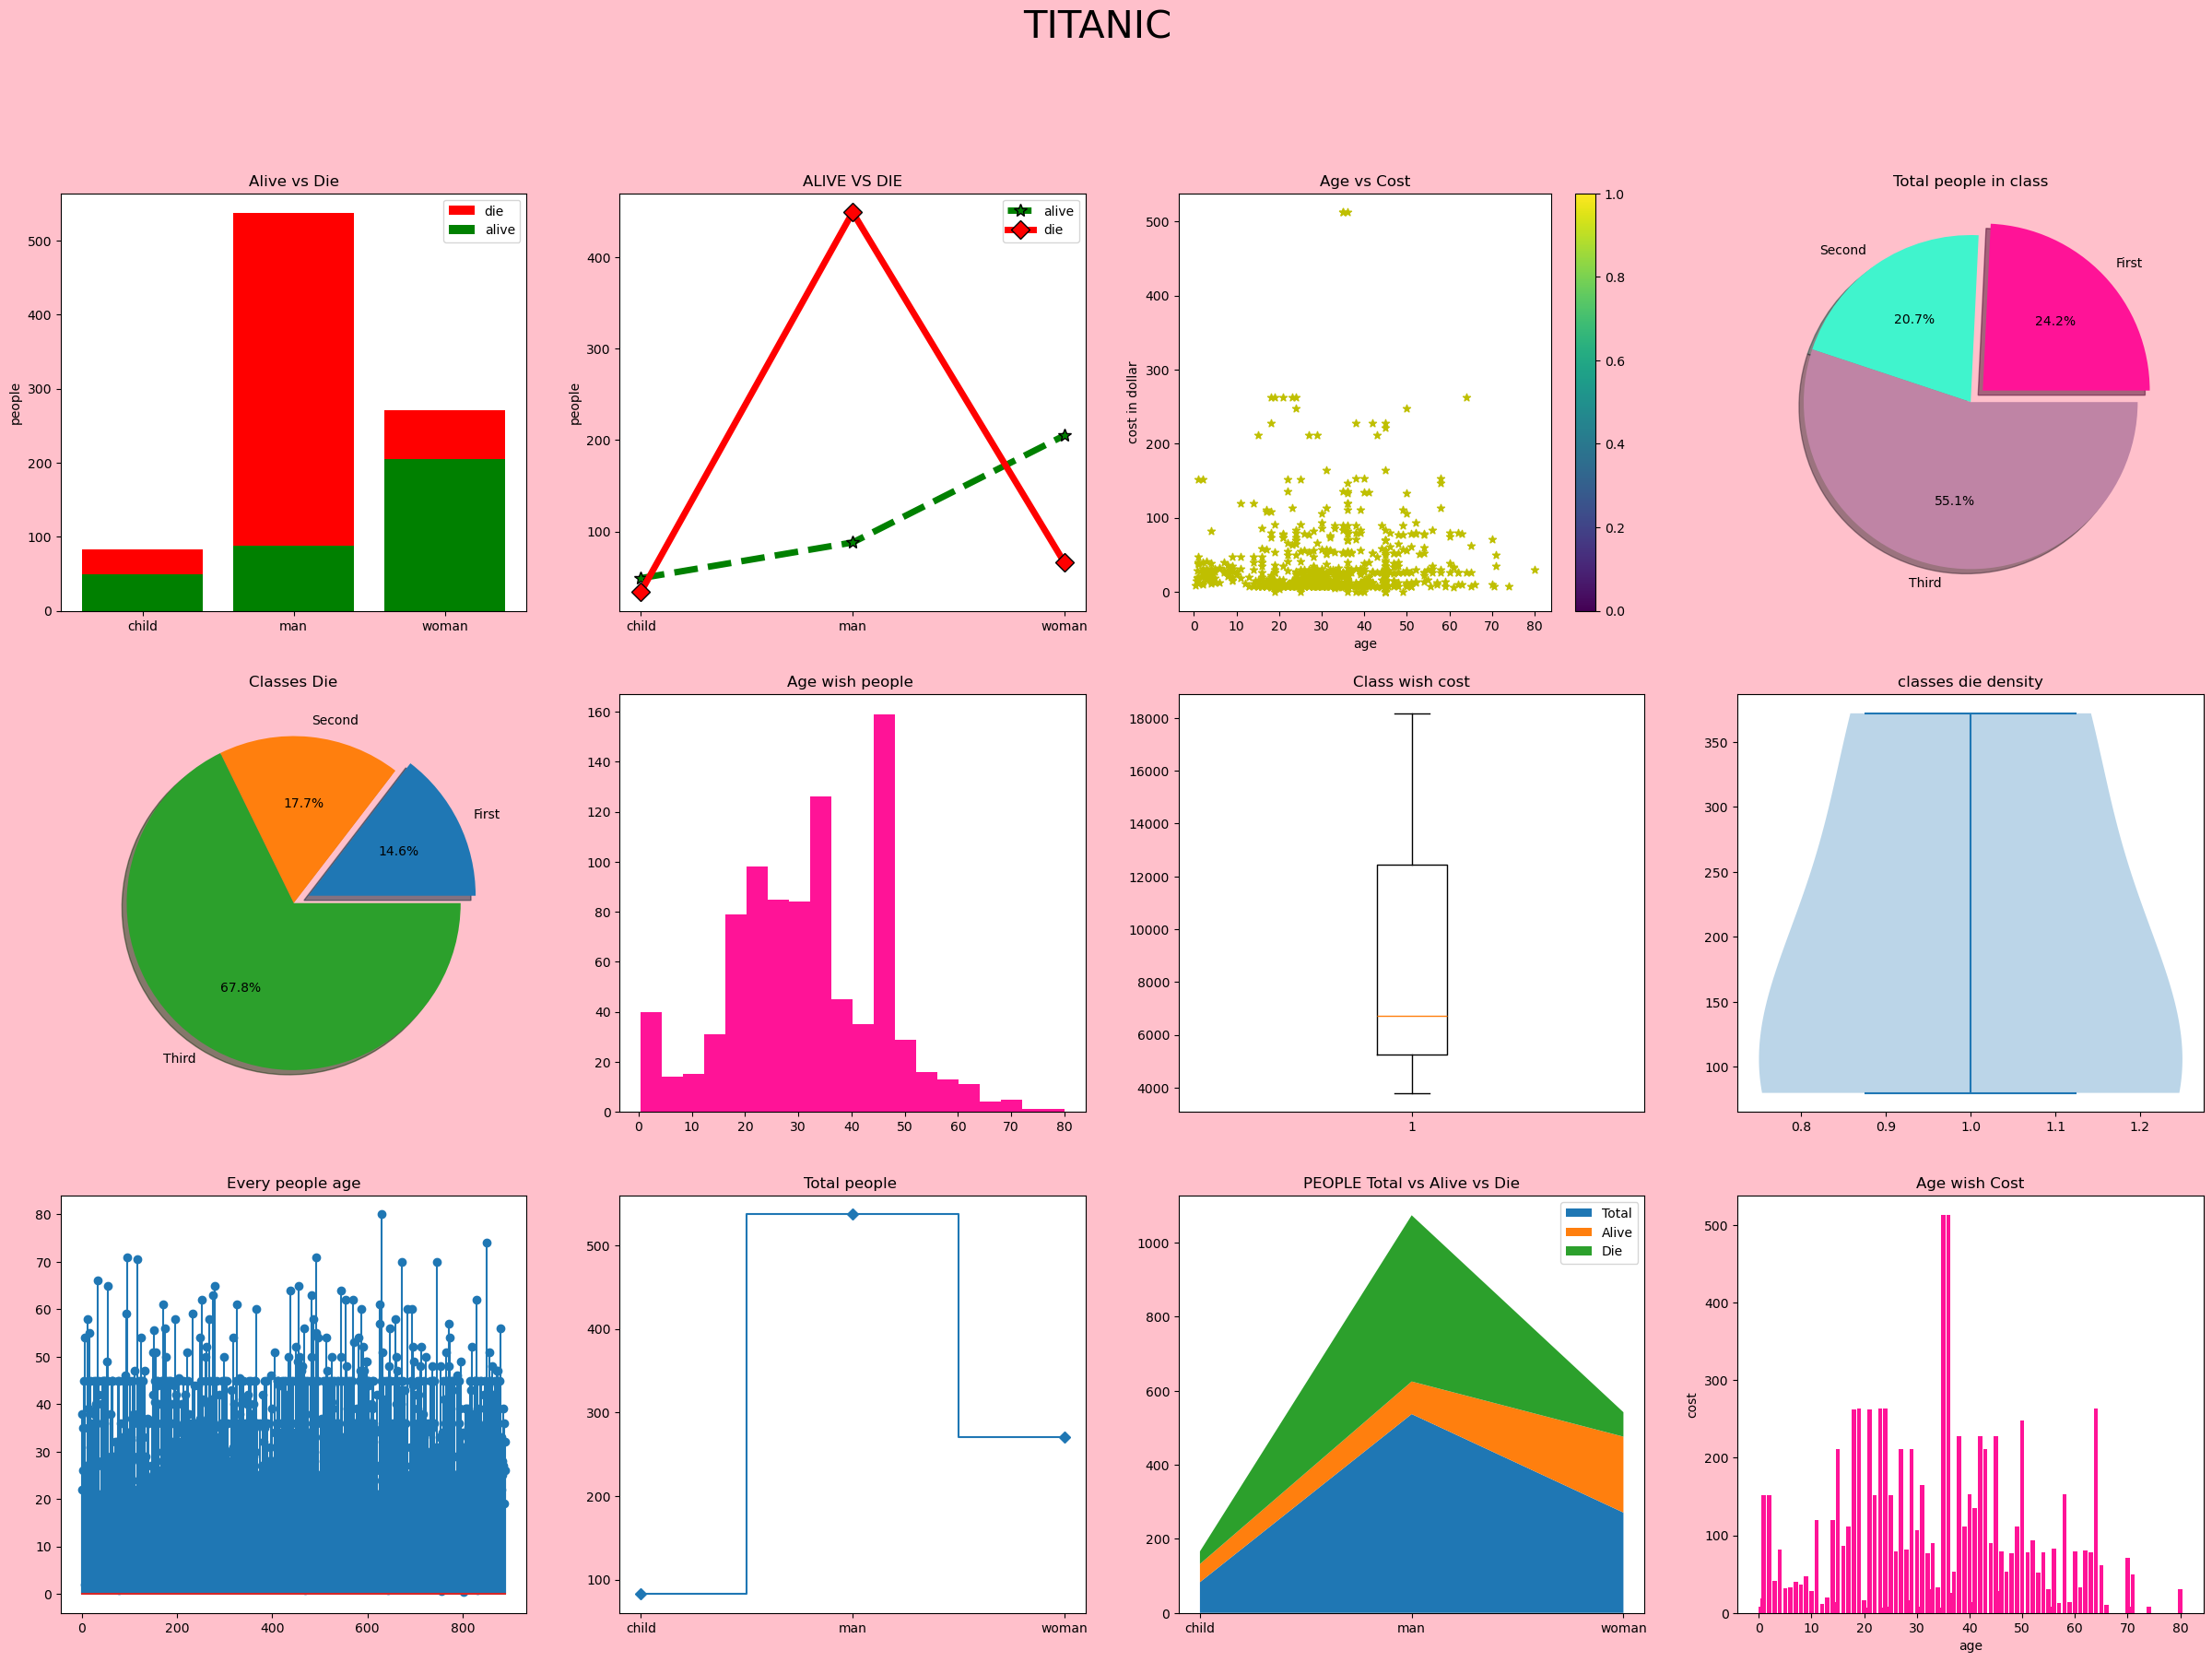

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

data=pd.read_csv("C:/Users/NASIM/Downloads/excel free data/titanic.csv")



data.loc[(data["who"]=="man") & (data["age"].isna()),"age"]=45
data.loc[(data["who"]=="woman") & (data["age"].isna()),"age"]=36
data.loc[(data["who"]=="child") & (data["age"].isna()),"age"]=5 
data.head(50)

total=data.groupby("who")["age"].count() #1
print(total,"people")
print()

alive=data.groupby("who")["survived"].sum()  #2
print("people alive",alive)
print()

die=data[data["alive"]=="no"].groupby("who").size()    #3
print("die people",die)
print()

cost=data.groupby("class")["fare"].sum()         #4
print("class wise cost",cost)
print()

cdie=data[data["alive"]=="no"].groupby("class").size()  #5
print("class catagories die",cdie)
print()

class_p=data.groupby("class")["age"].count()          #6
print("class people ",class_p)
print()


plt.subplots(3,4,figsize=(30,20),facecolor='pink')



plt.subplot(3,4,1)
# plt.gca().patch.set_facecolor('yellow')
plt.bar(total.index,total.values,label="die",color="r")
plt.bar(alive.index,alive.values,color="g",label="alive")
plt.ylabel("people")
plt.title("Alive vs Die")
plt.legend()


plt.subplot(3,4,2)
plt.ylabel("people")
plt.title("ALIVE VS DIE")
plt.plot(alive.index,alive.values,color="g",ls="--",lw=5,marker="*",ms=10,label="alive",mec="black")
plt.plot(die.index,die.values,color="r",lw=5,marker="D",ms=10,label="die",mec="black")
plt.legend()


plt.subplot(3,4,3)
plt.scatter(data["age"],data["fare"],marker="*",cmap="hot",c="y")
plt.colorbar()
plt.xlabel("age")
plt.ylabel("cost in dollar")
plt.title("Age vs Cost")


ex=[0.1,0,0]
color=["#ff1397","#40f4cd","#BF84A5"]

plt.subplot(3,4,4)
plt.pie(class_p.values,labels=class_p.index,shadow=True,autopct="%0.1f%%",explode=ex,colors=color)
plt.title("Total people in class")




plt.subplot(3,4,5)
plt.pie(cdie.values,labels=cdie.index,shadow=True,autopct="%0.1f%%",explode=ex)
plt.title("Classes Die")

plt.subplot(3,4,6)
plt.hist(data["age"],bins=20,color="#ff1397")
plt.title("Age wish people ")

plt.subplot(3,4,7)
plt.boxplot(cost.values)
plt.title("Class wish cost")


plt.subplot(3,4,8)
plt.violinplot(cdie.values)
plt.title("classes die density")


plt.subplot(3,4,9)
plt.stem(data["age"])
plt.title("Every people age")


plt.subplot(3,4,10)
plt.step(total.index,total.values,where="mid",marker="D")
plt.title("Total people ")

plt.subplot(3,4,11)
plt.stackplot(total.index,total.values,alive.values,die.values,labels=['Total', 'Alive', 'Die'])
plt.title("PEOPLE Total vs Alive vs Die")
plt.legend()


plt.subplot(3,4,12)
plt.bar(data["age"],data["fare"],color="#ff1397")
plt.xlabel("age")
plt.ylabel("cost")
plt.title("Age wish Cost")


plt.suptitle('TITANIC',fontsize=30)
plt.savefig("titanic.png")
# plt.subplots(facecolor='skyblue')
plt.show()